# Youtube analysis

From the data source located in [Kaggle](https://www.kaggle.com/datasnaek/youtube), we'll do some data manipulations based in comments aims to predict some sentiment analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 19, 9
import seaborn as sns
import json

## Load and explore the data

First of all, we will load and explore the data

### Loading

In [2]:
gb_videos = pd.read_csv('data/GBvideos.csv', error_bad_lines=False)

b'Skipping line 2398: expected 11 fields, saw 21\nSkipping line 2797: expected 11 fields, saw 21\n'


In [3]:
videos = gb_videos

### Exploring

The data itselfs:

In [4]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,apple events|apple event|iphone 8|iphone x|iph...,7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,13.09
1,AqokkXoa7uE,Holly and Phillip Meet Samantha the Sex Robot ...,This Morning,24,this morning|interview|holly willoughby|philli...,494203,2651,1309,0,https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg,13.09
2,YPVcg45W0z4,My DNA Test Results! I'm WHAT?!,emmablackery,24,emmablackery|emma blackery|emma|blackery|briti...,142819,13119,151,1141,https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg,13.09
3,T_PuZBdT2iM,getting into a conversation in a language you ...,ProZD,1,skit|korean|language|conversation|esl|japanese...,1580028,65729,1529,3598,https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg,13.09
4,NsjsmgmbCfc,Baby Name Challenge!,Sprinkleofglitter,26,sprinkleofglitter|sprinkle of glitter|baby gli...,40592,5019,57,490,https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg,13.09


Now, let's see some numbers based on channels:

In [5]:
videos.groupby(['channel_title']).agg({'views':'sum', 'likes': 'sum', 'dislikes': 'sum'})

,views,likes,dislikes
channel_title,,,
100PercentChelsea,319874,5320,1089
1theK (원더케이),32328504,992172,42622
2017 FlashTrendinG,5819164,2502,245
20th Century Fox,99461458,700262,69077
21 Savage,63999673,2477419,79663
...,...,...,...
y2ksale,52521,93,0
Мегаполис,1985296,4687,597
Томикс-ТВ online,1245030,4600,172


Now, about channels, let's see about `views`, `likes` and `dislikes`

In [6]:
videos.groupby(['category_id']).agg({'views':['min', 'max'], 'likes': ['min', 'max'], 'dislikes': ['min', 'max']})

views           likes          dislikes        
               min       max   min      max      min     max
category_id                                                 
1             4480   6779570     0   138606        0   14402
2            16252  11387085    22    47761        4    2248
10               0  58961407     0  2289911        0  143464
15            4423   3611553    14    71737        1    1918
17            1598  14960281     0   446880        0    9969
19           11807    474775     6    11029        0     331
20            2116   4136625    22   158760        0    8481
22             498  17521230     0   437405        0   41138
23            2217  17659415     0   969570        0   35387
24            2063  35300501     0  1022015        0  192725
25            1371  16514687     0    64455        0    7524
26            8633   5551822   165   505334        5   18490
27            9207   3512713     0   139562        0    7494
28           25615   8443106     0    86006        0   15504
29            1441    119431     5      274        0      62

## Data manipulation and feature engineering

## Loading categories names

In [7]:
file_category = open('data/GB_category_id.json')
data = file_category.read()
file_category.close()
out = json.loads(data)
categories = pd.DataFrame([
    {'category_id':x['id'],
     'category':x['snippet']['title'],
     'assignable':x['snippet']['assignable']
    } for x in out['items']
])

In [8]:
categories.head()

,category_id,category,assignable
0,1,Film & Animation,True
1,2,Autos & Vehicles,True
2,10,Music,True
3,15,Pets & Animals,True
4,17,Sports,True


In [9]:
categories['category_id'] = categories['category_id'].astype(int)

In [10]:
videos['category_id'] = videos['category_id'].astype(int)
videos['date'] = videos['date'].apply(lambda x: pd.to_datetime("{:05.2f}".format(x).replace('.','') + "2017", format='%d%m%Y'))
videos['date'] = videos['date'].dt.date
videos = videos.drop_duplicates()
videos = videos.merge(categories, on='category_id')

In [11]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,category,assignable
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,apple events|apple event|iphone 8|iphone x|iph...,7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,2017-09-13,Science & Technology,True
1,BRzPaDMeRks,These Are The Best Features Coming To iPhones.,UrAvgConsumer,28,uravgconsumer|uac|your average consumer|ios 11...,352276,13098,508,1297,https://i.ytimg.com/vi/BRzPaDMeRks/default.jpg,2017-09-13,Science & Technology,True
2,8QgMh02JvS8,The $80 Smartphone Challenge,Austin Evans,28,smartphone|challenge|gadgets|android|budget|ch...,387841,12097,458,1771,https://i.ytimg.com/vi/8QgMh02JvS8/default.jpg,2017-09-13,Science & Technology,True
3,AR4UgRJOUQY,What Does Your Search History Say About You?,AsapSCIENCE,28,Search History|Delete Search History|Google Da...,1244984,29748,2639,4112,https://i.ytimg.com/vi/AR4UgRJOUQY/default.jpg,2017-09-13,Science & Technology,True
4,xo2B67vz4HA,Small Hands Samsung Galaxy Note 8 Review,Linus Tech Tips,28,samsung|galaxy|note 8|review|unboxing|overview...,626419,20553,1033,2138,https://i.ytimg.com/vi/xo2B67vz4HA/default.jpg,2017-09-13,Science & Technology,True


### New features *enthusiasm* and *satisfaction*

Let's introduce two new variables, called *enthusiasm* and *satisfaction*:


$ enthusiasm = \frac{\sum likes}{\sum likes + \sum dislikes} $

$satisfaction = \frac{\sum likes - \sum dislikes}{\sum views }$

The $satisfaction$ measure will be normilized using *z-norm*: $z_i=\frac{x_i-\min(x)}{\max(x)-\min(x)}$

In [12]:
videos['enthusiasm'] = videos['likes'] / (videos['likes'] + videos['dislikes'])
videos['satisfaction'] = (videos['likes'] - videos['dislikes']) / videos['views']
videos['satisfaction'] = (videos['satisfaction'] - min(videos['satisfaction']))/(max(videos['satisfaction']) - min(videos['satisfaction']))

In [13]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,category,assignable,enthusiasm,satisfaction
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,apple events|apple event|iphone 8|iphone x|iph...,7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,2017-09-13,Science & Technology,True,0.852399,0.128753
1,BRzPaDMeRks,These Are The Best Features Coming To iPhones.,UrAvgConsumer,28,uravgconsumer|uac|your average consumer|ios 11...,352276,13098,508,1297,https://i.ytimg.com/vi/BRzPaDMeRks/default.jpg,2017-09-13,Science & Technology,True,0.962664,0.203642
2,8QgMh02JvS8,The $80 Smartphone Challenge,Austin Evans,28,smartphone|challenge|gadgets|android|budget|ch...,387841,12097,458,1771,https://i.ytimg.com/vi/8QgMh02JvS8/default.jpg,2017-09-13,Science & Technology,True,0.963521,0.187767
3,AR4UgRJOUQY,What Does Your Search History Say About You?,AsapSCIENCE,28,Search History|Delete Search History|Google Da...,1244984,29748,2639,4112,https://i.ytimg.com/vi/AR4UgRJOUQY/default.jpg,2017-09-13,Science & Technology,True,0.918517,0.164949
4,xo2B67vz4HA,Small Hands Samsung Galaxy Note 8 Review,Linus Tech Tips,28,samsung|galaxy|note 8|review|unboxing|overview...,626419,20553,1033,2138,https://i.ytimg.com/vi/xo2B67vz4HA/default.jpg,2017-09-13,Science & Technology,True,0.952145,0.190958


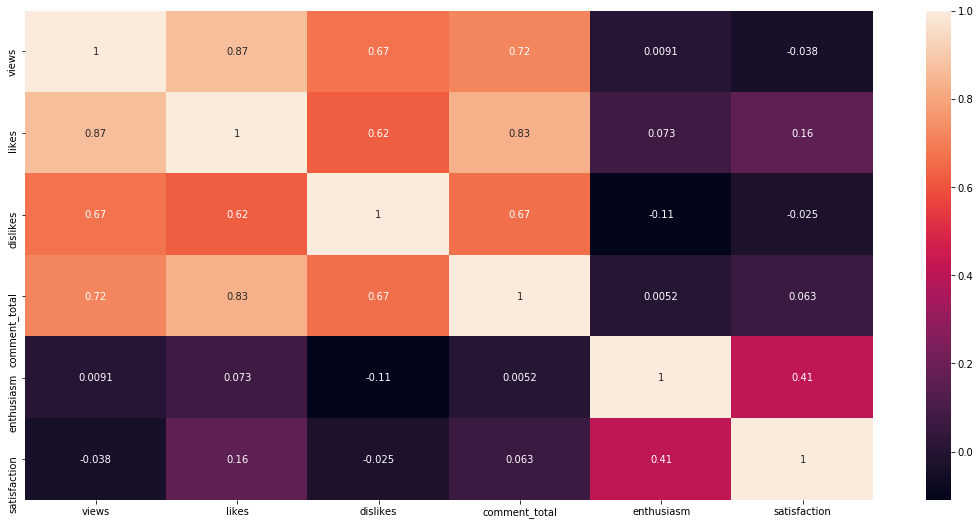

In [14]:
sns.heatmap(videos[['views', 'likes', 'dislikes', 'comment_total', 'enthusiasm', 'satisfaction']].corr(),annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

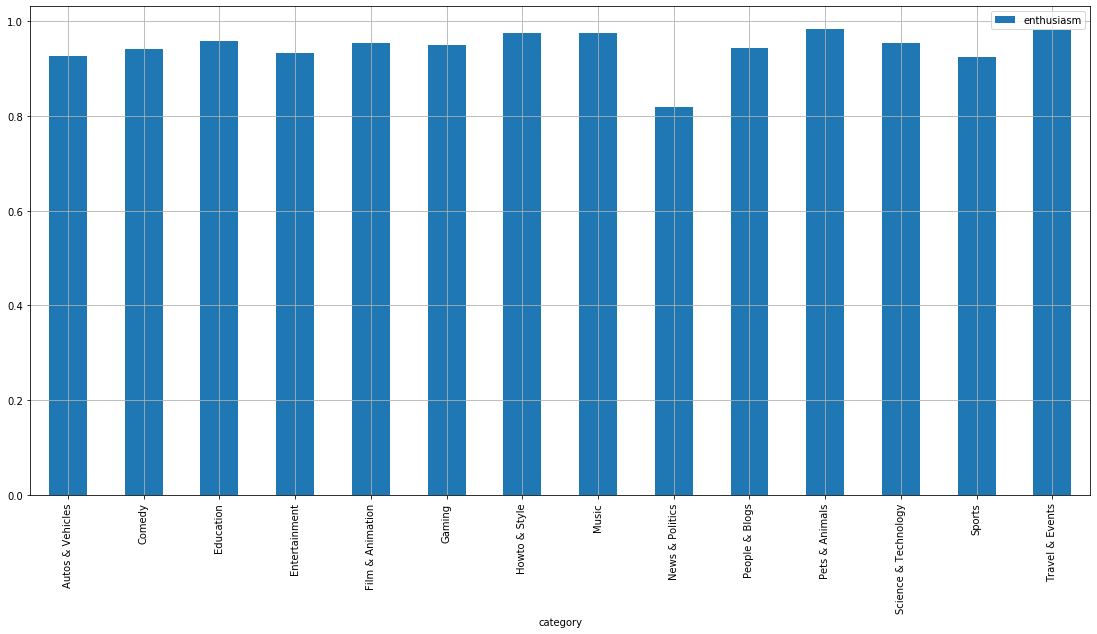

In [29]:
cat_average_enthusiasm = videos.groupby(['category'])['enthusiasm'].mean() # median
enthusiasm_df = cat_average_enthusiasm.to_frame() #.sort_values(['enthusiasm'])
enthusiasm_df.plot(kind = 'bar', grid=True)

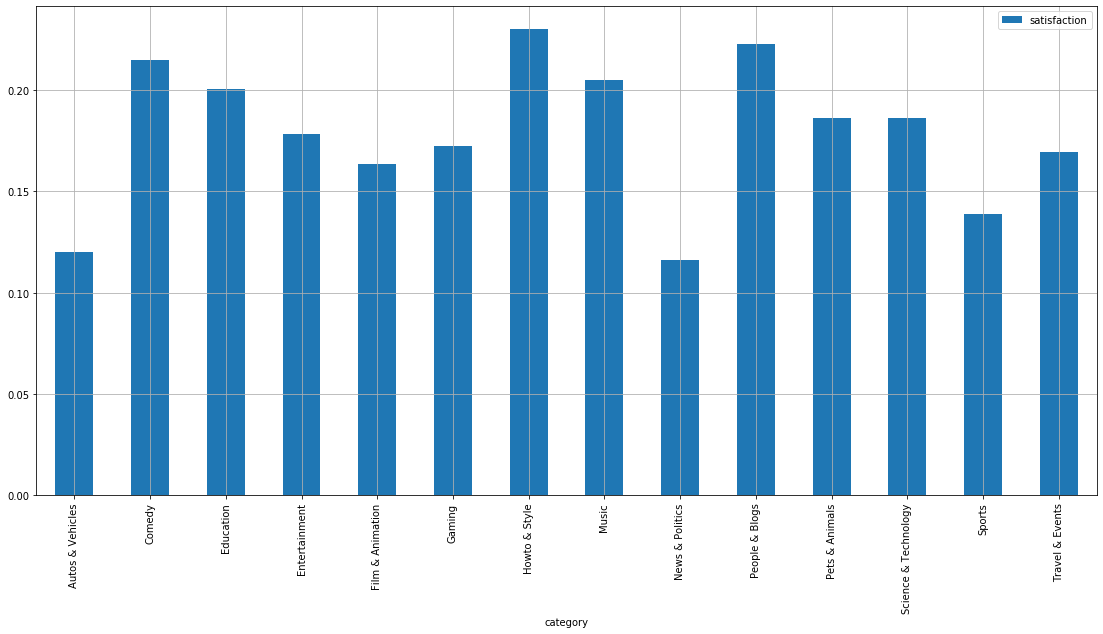

In [28]:
cat_average_satisfaction = videos.groupby(['category'])['satisfaction'].median() # median
satisfaction_df = cat_average_satisfaction.to_frame()
satisfaction_df.plot(kind = 'bar', grid=True)

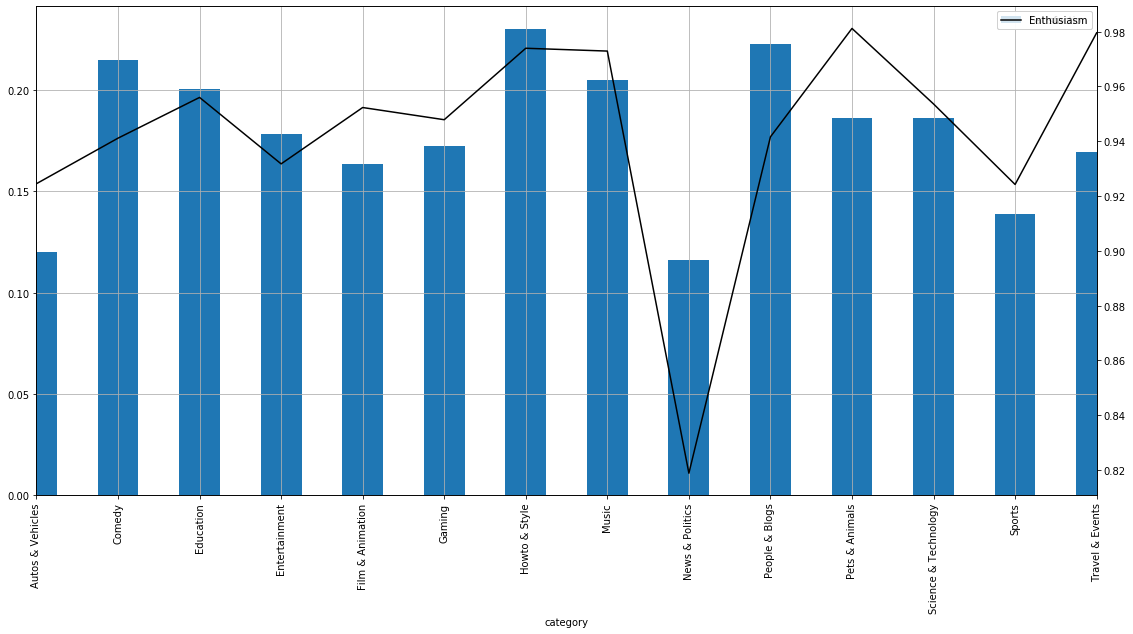

In [27]:
satisfaction_df.satisfaction.plot(kind='bar').legend(['Satisfaction'])
enthusiasm_df.enthusiasm.plot(kind='line', secondary_y=True, rot=90, color='k', grid=True).legend(['Enthusiasm'])

In [18]:
measures = pd.concat([enthusiasm_df, satisfaction_df],  axis=1, join='inner')

In [19]:
measures.corr()

,enthusiasm,satisfaction
enthusiasm,1.000000,0.641421
satisfaction,0.641421,1.000000


## Tags

In [20]:
tags_df = pd.DataFrame()

In [21]:
for idx in range(len(videos)):
    tags = list(set(videos.tags[idx].lower().split('|')))
    tags_df = tags_df.append(pd.DataFrame({'tag': tags, 'category_id': [videos.category_id[idx]] * len(tags)}))

In [22]:
tags_df.head()

,tag,category_id
0,iphone x,28
1,apple events,28
2,iphone 8,28
3,iphone 7s,28
4,iphone 7s plus,28


In [23]:
tags_group_df = tags_df.groupby(['category_id', 'tag']).tag.agg('count').rename(columns={'tag':'tag_count'}).to_frame().reset_index()
tags_group_df = tags_group_df.rename(columns={0: "count"})

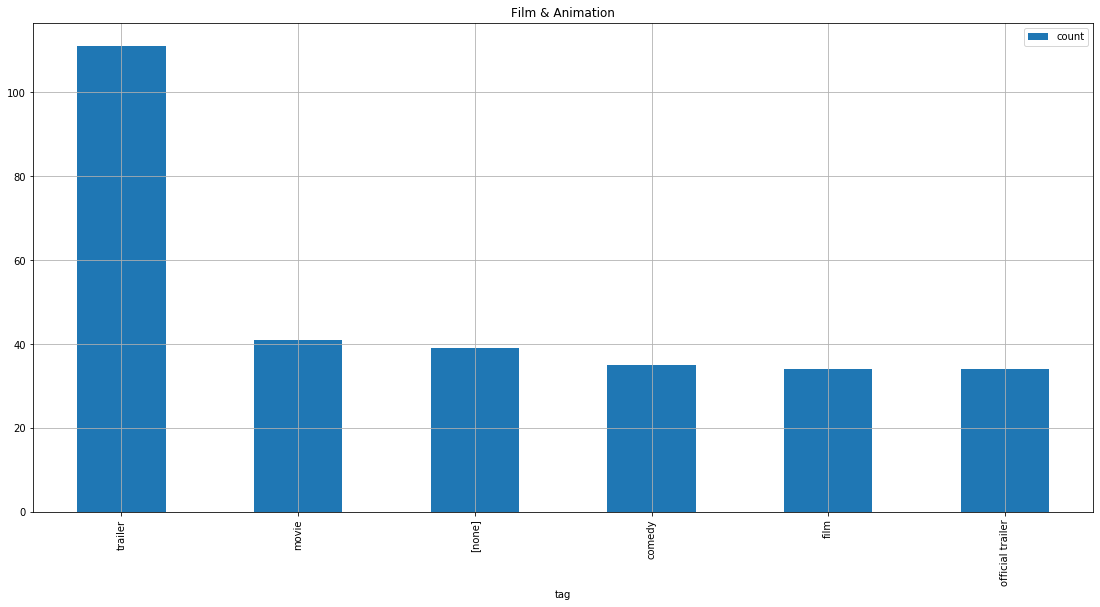

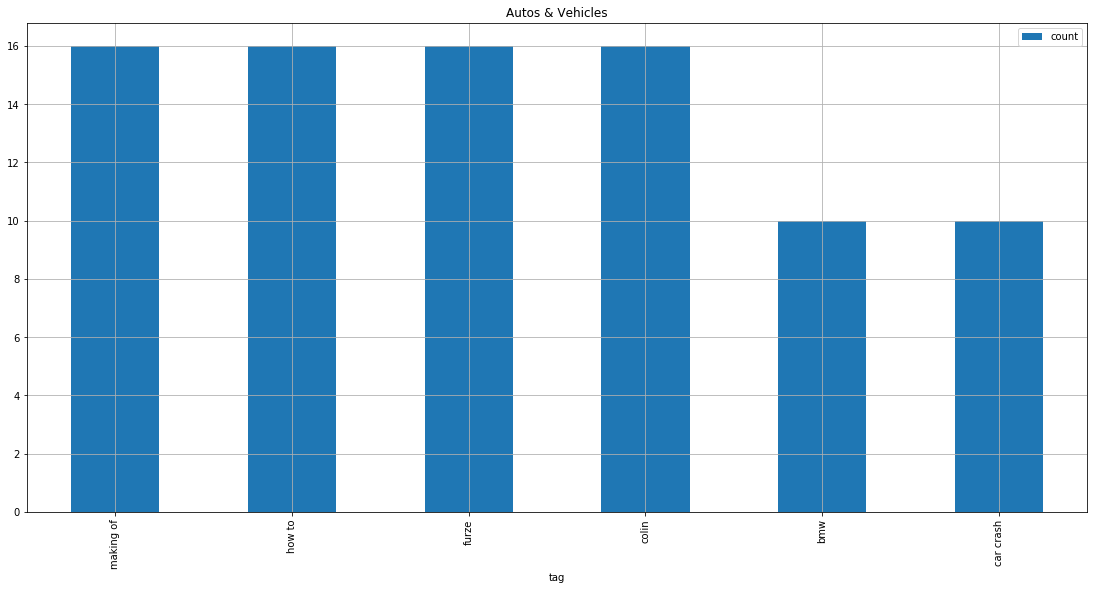

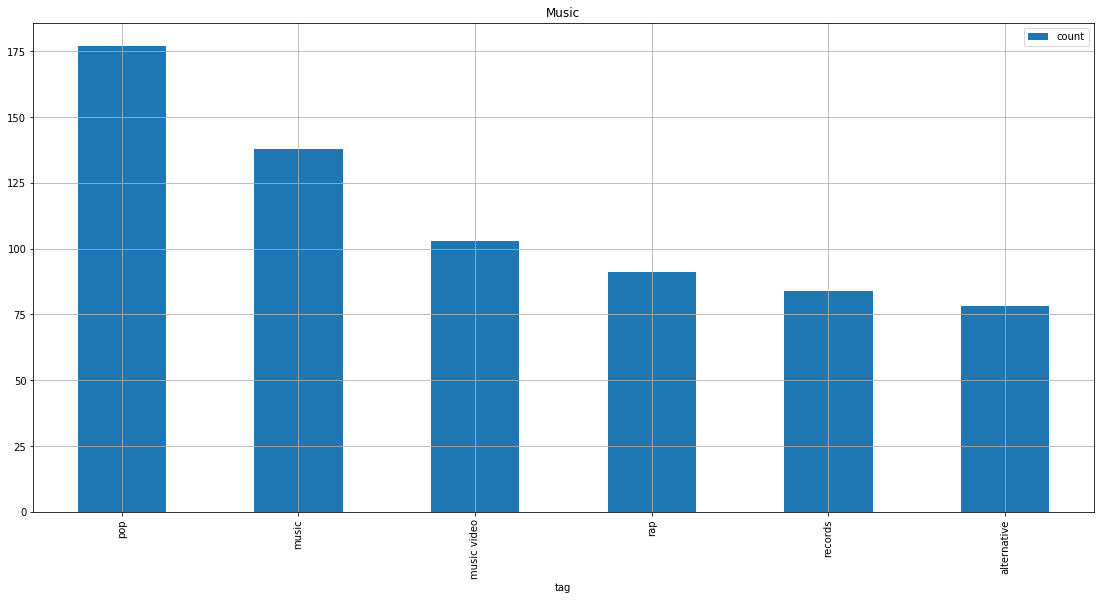

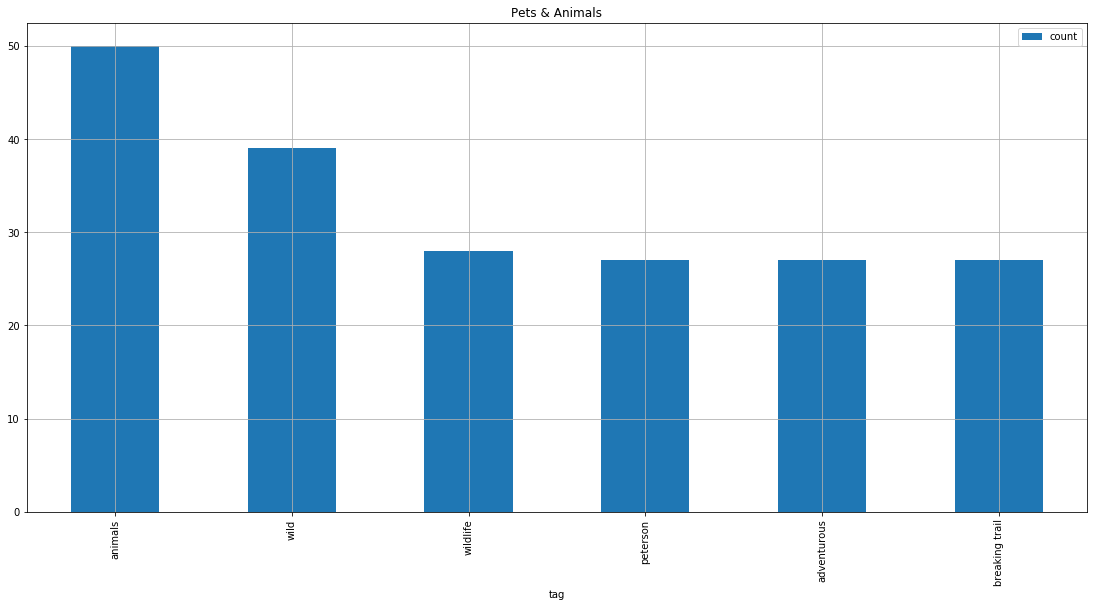

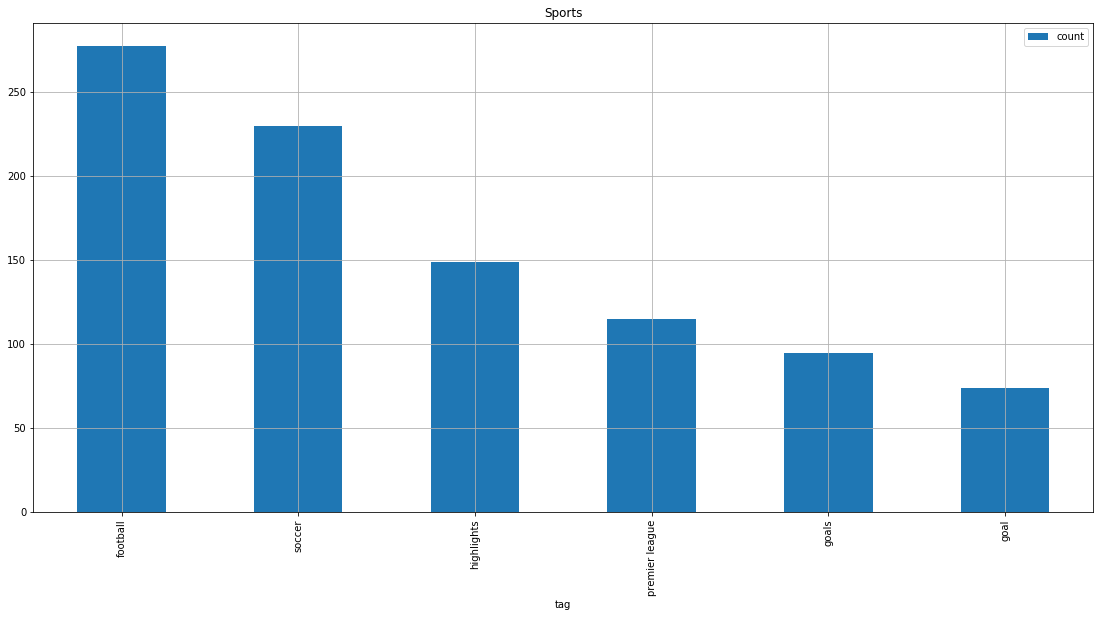

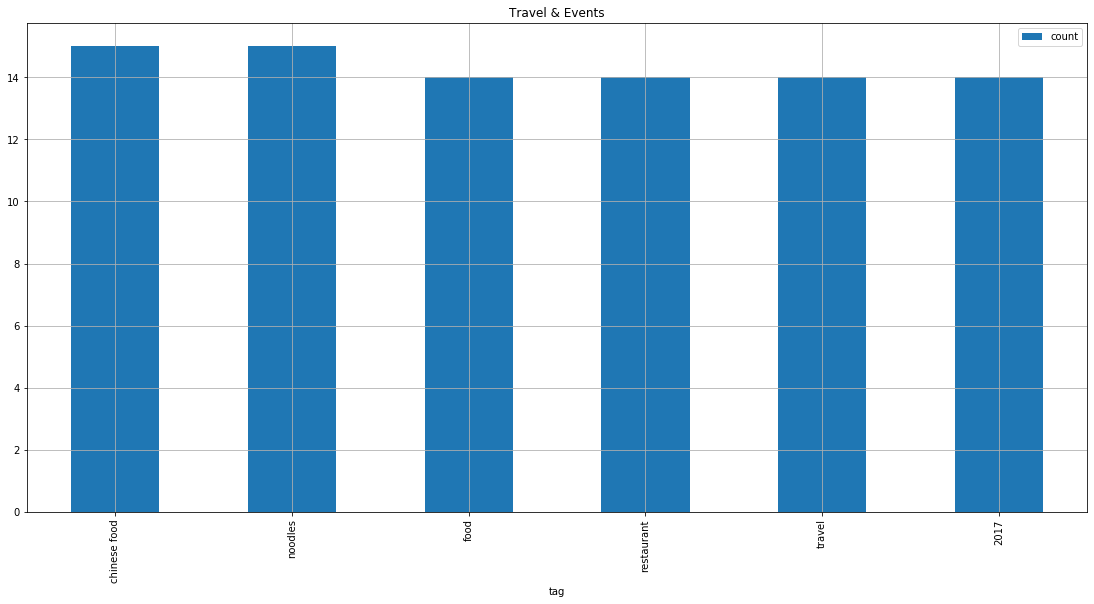

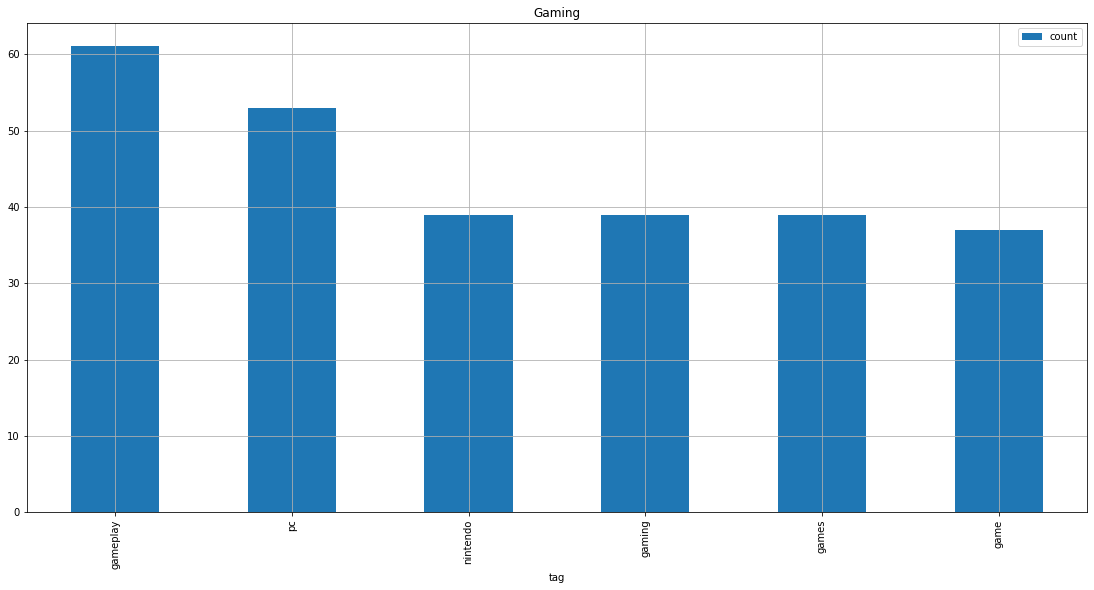

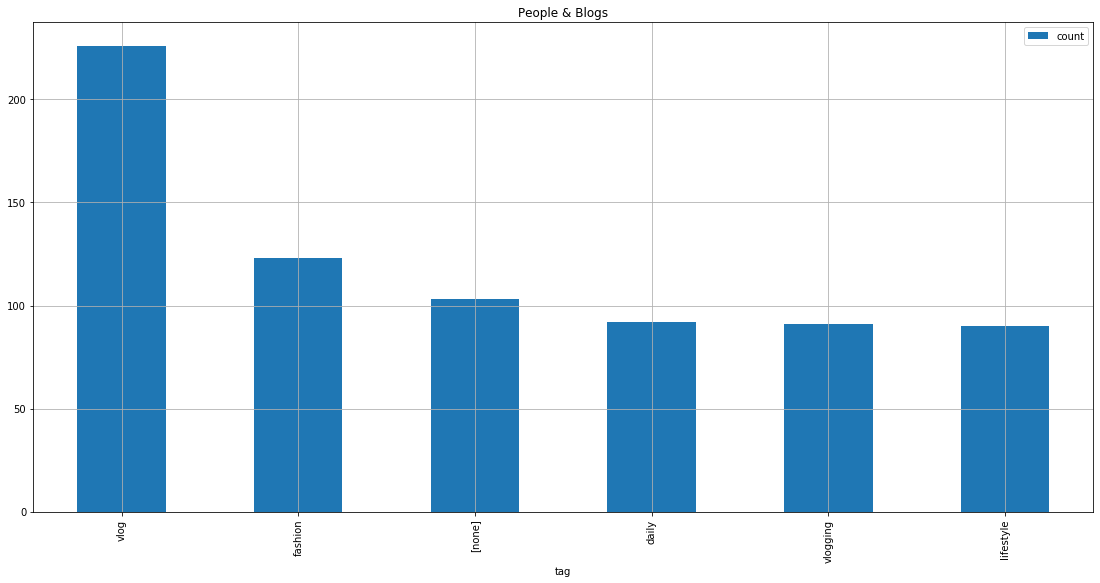

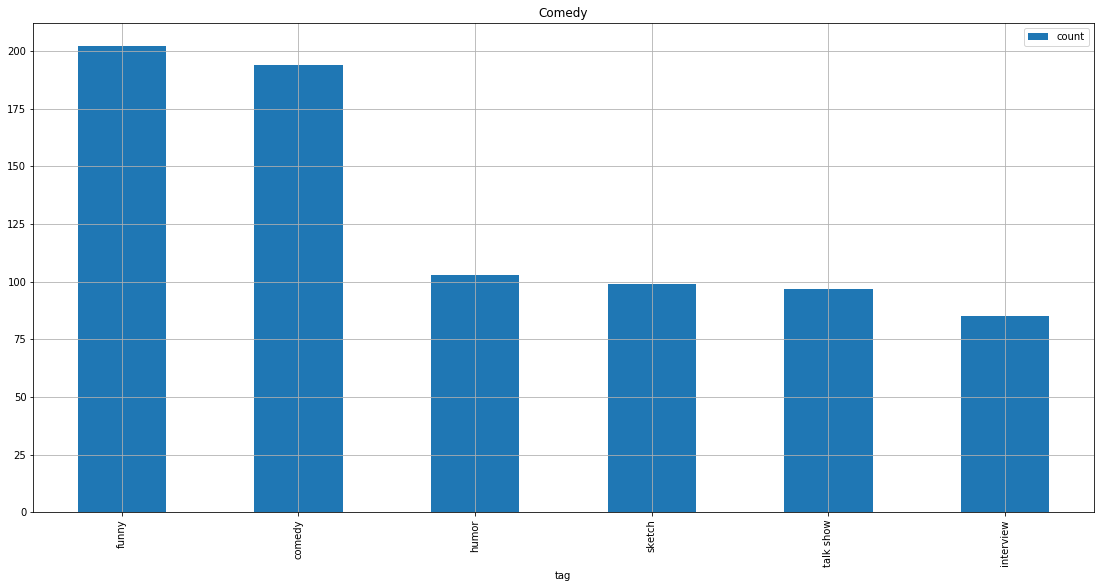

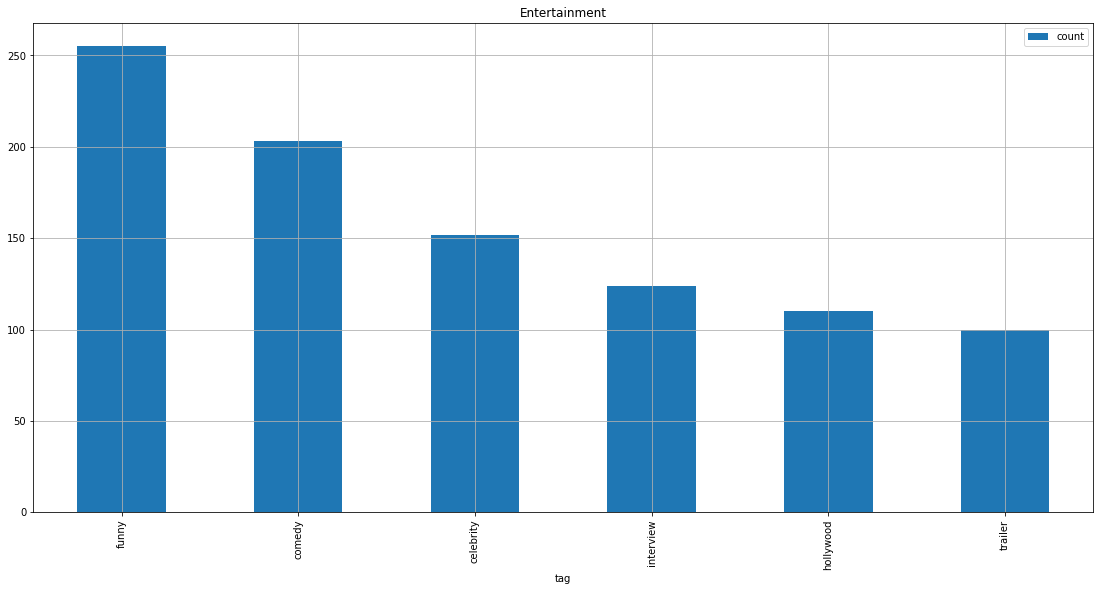

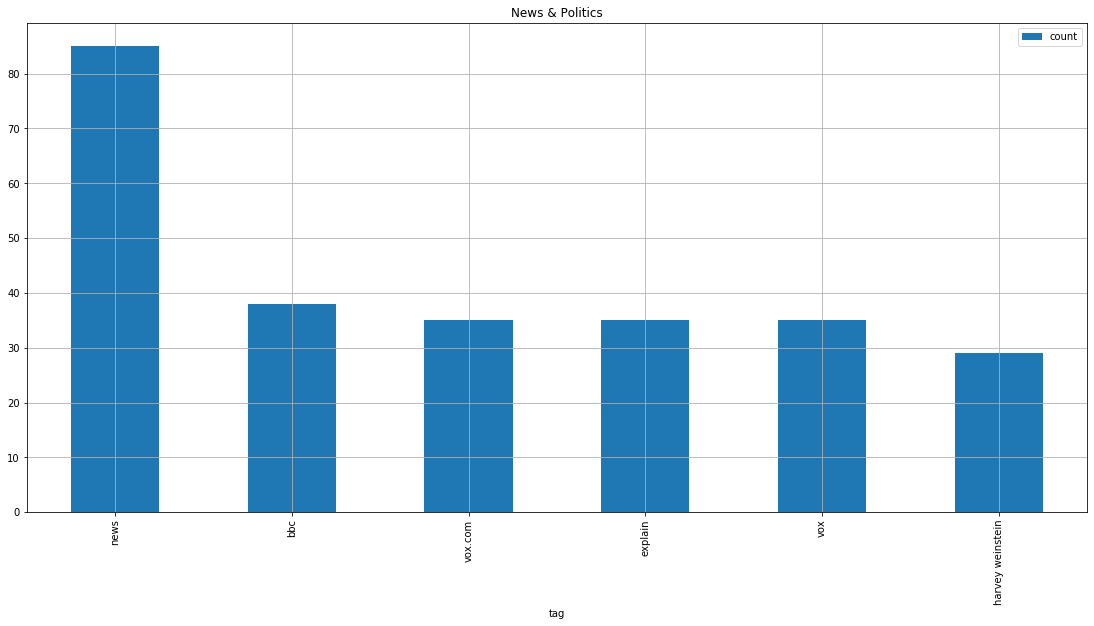

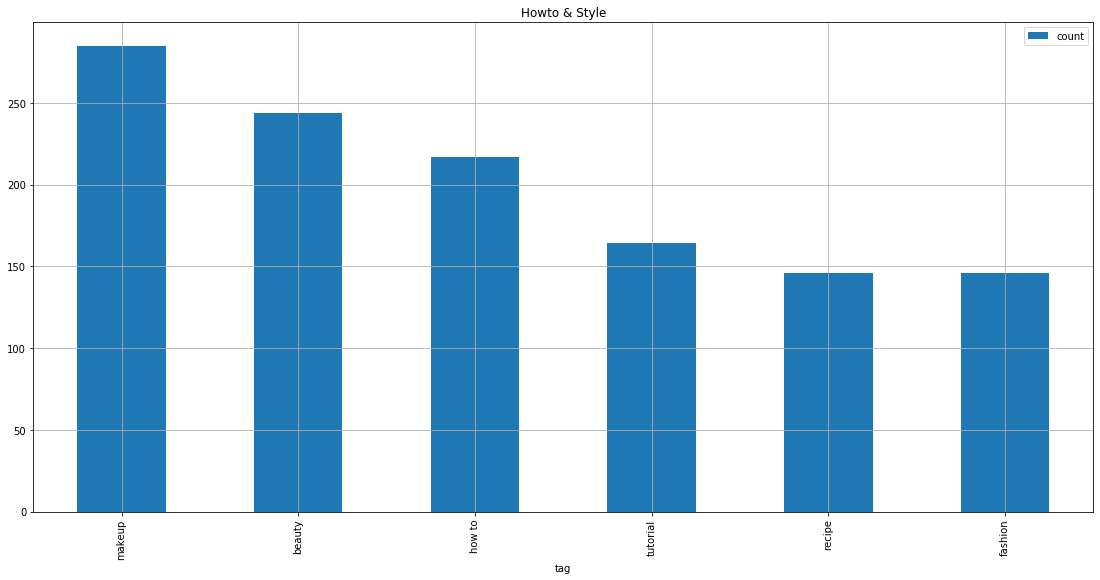

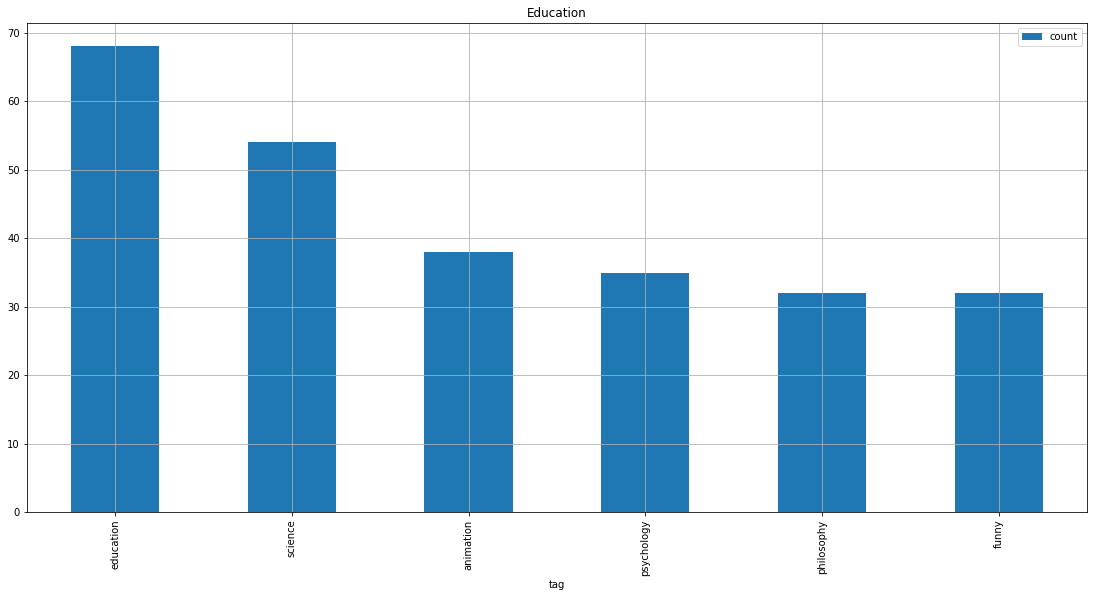

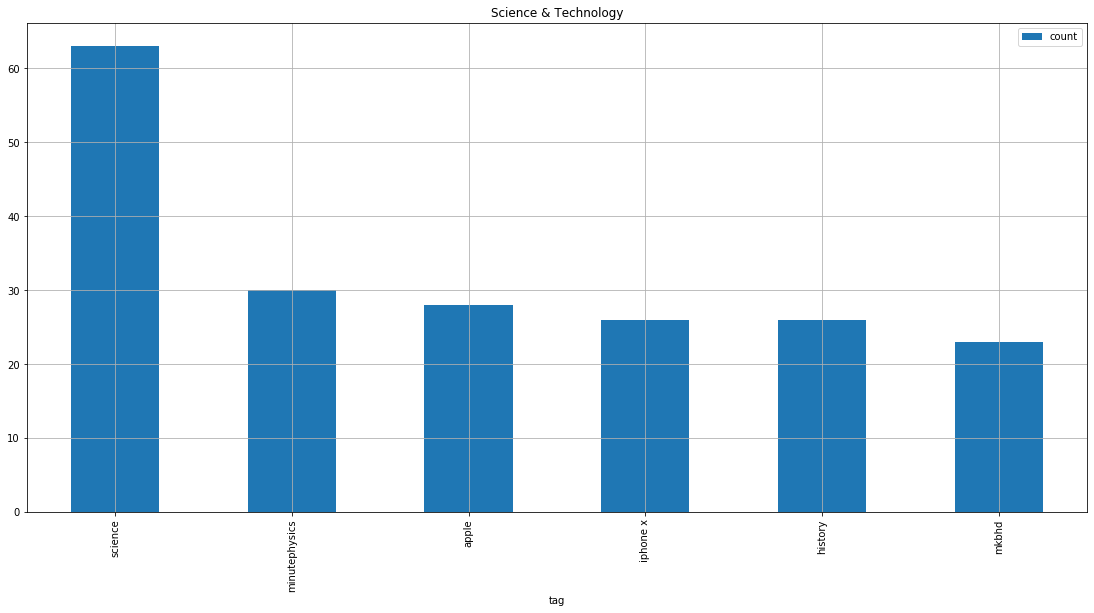

In [26]:
for cat in list(set(tags_group_df.category_id)):
    title = categories.loc[categories["category_id"] == cat].category.any()
    curCatDF = tags_group_df.loc[tags_group_df['category_id'] == cat]
    curCatDF.sort_values('count', ascending = False).head(6).plot(
        x = 'tag', 
        y = 'count', 
        kind = 'bar',
        title = title,
    grid=True)

## TODO: Cumulative flow diagram